In [96]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd  

# 1. Data Understanding

## 1.1 Collect Initial Data
### 1.1.1 方法: API, Log, ETL/ELT, Crawler, ...
### 1.1.2 平台: Flume, Fluentd, Logstash, Chukwa, Scribe, Splunk/Forwarder

## 1.2 Sampling
### 1.2.1 Probability Sampling Method
#### 1.2.1.1 Stratified Sampling
#### 1.2.1.2 Systematic Sampling
#### 1.2.1.3 Simple Random Sampling
#### 1.2.1.4 Cluster Sampling
#### 1.2.1.5 各种抽样方法的抽样误差一般是: Clustering ≥ Simple Random ≥ Systematic ≥ Stratified。
### 1.2.2 Non-Probability Sampling Method
#### 1.2.2.1 Convenience Sampling
#### 1.2.2.2 Quota Sampling
#### 1.2.2.3 Judgement Sampling
#### 1.2.2.4 Snowball Sampling
### 1.2.3 Data Method
#### 1.2.3.1 Hold-out
#### 1.2.3.1 Cross Validation

## 1.3 Data Description
### 1.3.1 Enumeration: $\{1,2,3,...,10\}$
### 1.3.2 Function: $y=ax+b$
### 1.3.3 列表法

### 1.3.3 Line Chart

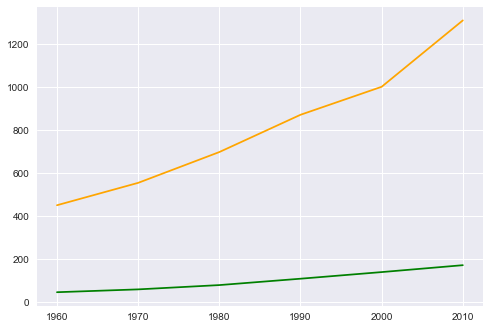

In [97]:
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]

plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.show()

### 1.3.4 Fan Diagram

0
1
2


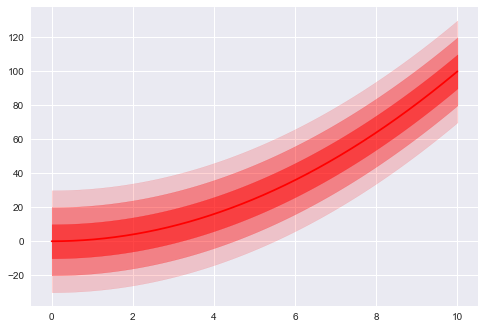

In [98]:
N = 1000
x = np.linspace(0, 10, N) #从 0 到 10 分成 N 份, 组成向量, 等差数列
y = x ** 2
ones = np.ones(N) # N 行, 所有元素为 1 的矩阵(向量)

vals = [30, 20, 10] # Values to iterate over and add/subtract from y.

fig, ax = plt.subplots()

for i, val in enumerate(vals):
    alpha = 0.5 * (i+1) / len(vals) # Modify the alpha value for each iteration.
    ax.fill_between(x, y+ones*val, y-ones*val, color='red', alpha=alpha)
    print(i)

ax.plot(x, y, color='red') # Plot the original signal
plt.show()

### 1.3.5 Bar Diagram

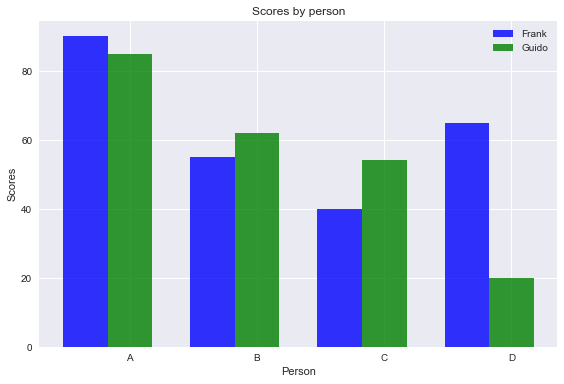

In [99]:
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width, alpha=opacity, color='b', label='Frank')
rects2 = plt.bar(index + bar_width, means_guido, bar_width, alpha=opacity, color='g', label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

### 1.3.6 Function Diagram

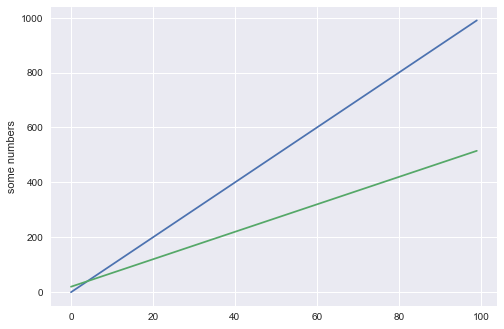

In [100]:
def fun1(x):
    return 10*x

def fun2(x):
    return 5*x+20

MAX_X = 100 # A maximum value for x goes here
x = range(MAX_X)

aa = [ (fun1(val), fun2(val)) for val in x ]
#print(aa)

#zip([seql, …])接受一系列可迭代对象作为参数，将对象中对应的元素打包成一个个tuple(元组)，然后返回由这些tuples组成的list(列表)。
#若传入参数的长度不等，则返回list的长度和参数中长度最短的对象相同。
y1, y2 = zip(*[ (fun1(val), fun2(val)) for val in x ])
#print(y2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.ylabel('some numbers')
plt.show()

## 1.4 Data Exploration

### 1.4.1 One-way 单变量

#### 1.4.1.1 Mean 
Population Mean: 
$${\mu=\frac{\sum\limits_{i=1}^{N}x_i}{N}}$$

Sample Mean: 
$$\overline{x}=\frac{\sum x_i}{n}$$

Weighted Mean: 
$$\overline{x}=\frac{\sum (x_i\cdot{w_i})}{\sum {w_i}}$$

Mean of a Frequency Distribution: 
$$\overline{x}=\frac{\sum (x_i\cdot{f_i})}{n}$$

In [101]:
np.mean([1, 2, 3, 4])

2.5

#### 1.4.1.2 Median

In [102]:
np.median([1, 2, 3, 4, 5, 6])

3.5

#### 1.4.1.3 Mode - $scipy.stats$

In [103]:
stats.mode([1, 1, 2, 3, 4, 5, 6, 5, 5, 5])

ModeResult(mode=array([5]), count=array([4]))

#### 1.4.1.4 Min

In [104]:
np.min([1, 2, 3, 4, 5, 6])

1

#### 1.4.1.5 Max

In [105]:
np.max([1, 2, 3, 4, 5, 6])

6

#### 1.4.1.6 Range
${Range=(Maximum\ entry) - (Minimum\ entry)}$

In [106]:
np.max([1, 2, 3, 4, 5, 6]) - np.min([1, 2, 3, 4, 5, 6])

5

#### 1.4.1.7 Quartiled Deviation 四分位距
四分位数是将一组数据由小到大（或由大到小）排序后, 用3个点将全部数据分为4等份, 与这3个点位置上相对应的数值称为四分位数, 分别记为Q1（第一四分位数）, 说明数据中有25%的数据小于或等于Q1, Q2（第二四分位数, 即中位数）说明数据中有50%的数据小于或等于Q2、Q3（第三四分位数）说明数据中有75%的数据小于或等于Q3。

其中, Q3到Q1之间的距离的差的一半又称为分半四分位差, 记为 (Q3-Q1)/2。
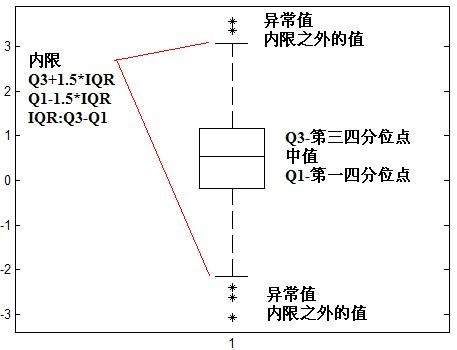

#### 1.4.1.8 Average Deviation 平均差: 各个数据与平均值的离差绝对值的算术平均数

#### 1.4.1.9 Variance 方差
Population Variance: 
$$\sigma^2=\frac{\sum (x-\mu)^2}{N}$$

Sample Variance: 
$$s_x^2=\frac{\sum (x-\overline{x})^2}{(n-1)}$$

In [107]:
np.var([1, 2, 3, 4, 5, 6])

2.9166666666666665

#### 1.4.1.10 Standard Deviation
Population Standard Deviation: 
$$\sigma=\sqrt{\sigma^2}=\sqrt{\frac{\sum (x-\mu)^2}{N}}$$

Sample Standard Deviation: 
$$s_x=\sqrt{s_x^2}=\sqrt{\frac{\sum (x-\overline{x})^2}{(n-1)}}$$

In [108]:
np.std([1, 2, 3, 4, 5, 6])

1.707825127659933

#### 1.4.1.11 Standard Error
标准误差（Standard error）, 也称均方根误差（Root Mean Squared Error）。

标准误差是指在抽样试验（或重复的等精度测量）中, 常用到样本平均数的标准差。注意: 标准差与标准误差, 计算公式类似, 但是是两个不同的概念。

Population Standard Error: 
$$\sigma_{\overline{x}}=\frac{\sigma}{{\sqrt{N}}}$$

Sample Standard Error: 
$$s_{\overline{x}}=\frac{s_x}{{\sqrt{n}}}$$

In [109]:
np.std([1, 2, 3, 4, 5, 6]) / np.sqrt(6)

0.6972166887783964

#### 1.4.1.12 Skewness
随机变量 X 的 K 阶原点矩:	$E(X^k)$

随机变量 X 的 K 阶中心矩:	$E([X-E(X)]^k)$

偏度: 
$$g_{1} = \frac{\sum\limits_{i=1}^{N}(Y_{i} - \bar{Y})^{3}/N} {s^{3}}$$

参考: 
$${\gamma_{1}=E\begin{bmatrix}\begin{pmatrix}{\large{\frac{X-{\mu}}{\sigma}}}\end{pmatrix}^3\end{bmatrix}
=\frac{E[(X-\mu)^3]}{(E[(X-\mu)^2])^{3/2}}=\frac{k_3}{k_2^{3/2}}}$$

参考: 
$$\gamma_{1}=E\begin{bmatrix}\begin{pmatrix}{\large{\frac{X-\mu}{\sigma}}}\end{pmatrix}^3\end{bmatrix}
=\frac{E[X^3]-3\mu E[X^2]+2{\mu}^2}{{\sigma}^3}=\frac{E[X^3]-3\mu {\sigma}^2-{\mu}^3}{{\sigma}^3}$$

In [110]:
stats.skew([1, 2, 2, 2, 2, 2, 3, 4, 5, 6])

0.8622384184103967

#### 1.4.1.13 Kurtosis
峰度:
$$\mbox{kurtosis} = \frac{\sum\limits_{i=1}^{N}(Y_{i} - \bar{Y})^{4}/N}{s^{4}}$$

参考:
$$\gamma_{2}=\frac{k_4}{k_2^2}=\frac{\mu ^4}{\sigma ^4}-3=\frac{\large{\frac{1}{n}} \sum\limits_{i=1}^{n}{(x_i-\bar{x})^4}}{(\large{\frac{1}{n}}\sum\limits_{i=1}^{n}{(x_i-\bar{x})^2})^2}-3$$


In [111]:
stats.kurtosis([1, 2, 2, 2, 2, 2, 3, 4, 5, 6])

-0.5290898342899637

In [112]:
import numpy as np
#!pip install stats
import stats as sts

scores = [31, 24, 23, 25, 14, 25, 13, 12, 14, 23,
          32, 34, 43, 41, 21, 23, 26, 26, 34, 42,
          43, 25, 24, 23, 24, 44, 23, 14, 52,32,
          42, 44, 35, 28, 17, 21, 32, 42, 12, 34]
df = pd.DataFrame(scores);

#集中趋势的度量
print('求和：       ', np.sum(scores))
print('个数：       ', len(scores))
print('平均值:      ', np.mean(scores))
print('中位数:      ', np.median(scores))
print('众数:        ', sts.mode(scores))
print('1.上四分位数: ', stats.mstats.mquantiles(scores, 0.25, alphap=0.5, betap=0.5))
print('2.上四分位数: ', df.quantile(.25));
print('3.上四分位数: ', sts.quantile(scores, p=0.25))
print('1.下四分位数: ', stats.mstats.mquantiles(scores, 0.75, alphap=0.5, betap=0.5))
print('2.下四分位数: ', df.quantile(.75));
print('3.下四分位数: ', sts.quantile(scores, p=0.75))
#离散趋势的度量
print('最大值:      ', np.max(scores))
print('最小值:      ', np.min(scores))
print('极差:        ', np.max(scores)-np.min(scores))
print('四分位差:     ', sts.quantile(scores, p=0.75) - sts.quantile(scores, p=0.25))
print('标准差:      ', np.std(scores))
print('方差:        ', np.var(scores))
print('离散系数:     ', np.std(scores) / np.mean(scores))
#偏度与峰度的度量
print('1.偏度:      ', stats.skew(scores))
print('2.偏度:      ', df.skew());
print('3.偏度:      ', sts.skewness(scores))
print('1.峰度:      ', stats.kurtosis(scores))
print('2.峰度:      ', df.kurtosis());
print('3.峰度:      ', sts.kurtosis(scores))

求和：        1137
个数：        40
平均值:       28.425
中位数:       25.5
众数:         23
1.上四分位数:  [23.]
2.上四分位数:  0    23.0
Name: 0.25, dtype: float64
3.上四分位数:  23
1.下四分位数:  [34.5]
2.下四分位数:  0    34.25
Name: 0.75, dtype: float64
3.下四分位数:  34
最大值:       52
最小值:       12
极差:         40
四分位差:      11
标准差:       10.312340907863742
方差:         106.34437499999999
离散系数:      0.3627912368641598
1.偏度:       0.2792199133755674
2.偏度:       0    0.290218
dtype: float64
3.偏度:       0.2688148840556402
1.峰度:       -0.7669197529186107
2.峰度:       0   -0.705764
dtype: float64
3.峰度:       -0.8771780901182544


#### 1.4.1.14 Histogram

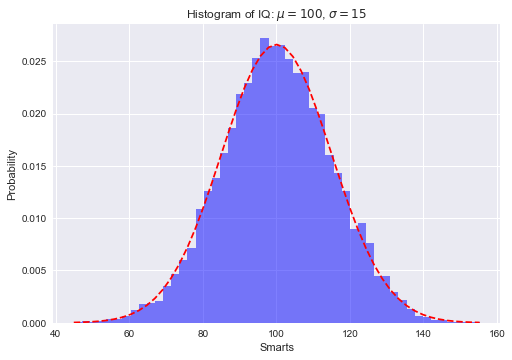

In [113]:
# 数据    
mu = 100 # mean of distribution    
sigma = 15 # standard deviation of distribution    
x = mu + sigma * np.random.randn(10000)    
    
num_bins = 50
# the histogram of the data    
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)    
  
# add a 'best fit' line    
y = plt.mlab.normpdf(bins, mu, sigma)    
plt.plot(bins, y, 'r--')    
plt.xlabel('Smarts')    
plt.ylabel('Probability')    
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')    
    
# Tweak spacing to prevent clipping of ylabel    
#plt.subplots_adjust(left=0.15)    
plt.show()    

#### 1.4.1.15 Box-Plot

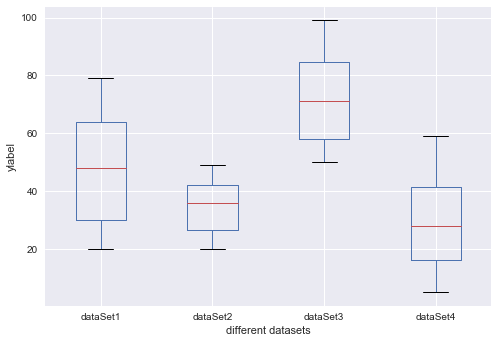

In [114]:
#generate data from min to max 
def list_generator(number, min, max):  
    dataList = list()  
    for i in range(1, number):  
        dataList.append(np.random.randint(min, max))  
    return dataList  
  
#generate 4 lists to draw  
list1 = list_generator(100, 20, 80)  
list2 = list_generator(100, 20, 50)  
list3 = list_generator(100, 50, 100)  
list4 = list_generator(100, 5, 60)  
  
data = pd.DataFrame({  
    "dataSet1":list1,  
    "dataSet2":list2,  
    "dataSet3":list3,  
    "dataSet4":list4,  
})  
  
#draw  
data.boxplot()  
plt.ylabel("ylabel")  
plt.xlabel("different datasets")  
plt.show()  

#### 1.4.1.16 Frequency Distribution Table 频率表

### 1.4.2 双变量

#### 1.4.2.1 Scatter Diagram (用于连续型变量和连续型变量)

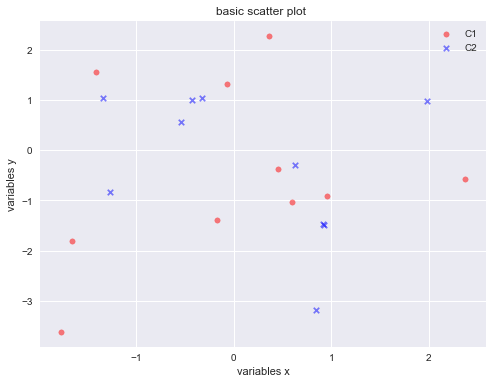

In [115]:
#定义两个矩阵
A1 = np.array([0, 0])
B1 = np.array(([2, 0], [0, 2]))

#以 A1为均值, B1为协方差矩阵, 生成正态分布的随机数
C1 = np.random.multivariate_normal(A1, B1, 10)
C2 = np.random.multivariate_normal(A1+0.2, B1+0.2, 10)

#画布的大小为长8cm高6cm
plt.figure(figsize=(8, 6))

#画图吧, s表示点点的大小, c就是color嘛, marker就是点点的形状哦o, x, *><^, 都可以啦
#alpha, 点点的亮度, label, 标签啦
plt.scatter(C1[:,0], C1[:,1], s=30, c='red', marker='o', alpha=0.5, label='C1')
plt.scatter(C2[:,0], C2[:,1], s=30, c='blue', marker='x', alpha=0.5, label='C2')

#下面三行代码很简单啦
plt.title('basic scatter plot ')
plt.xlabel('variables x')
plt.ylabel('variables y')

plt.legend(loc='upper right') #这个必须有, 没有你试试看
plt.show() #这个可以没有

#### 1.4.2.2 Correlation 相关系数 (用于连续型变量和连续型变量)
Covariance 协方差: $Cov(X,Y)=E[(X-\mu_x)(Y-\mu_y)]$

Correlation: 
$$\rho_{X,Y}=\frac{Cov(X,Y)}{\sigma_x \sigma_y}=\frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x \sigma_y}=\frac{E(XY)-E(X)E(Y)}{\sqrt{E(X^2)-E^2(X)}\sqrt{E(Y^2)-E^2(Y)}}$$

$$\rho_{X,Y}=\frac{N\sum{XY}-\sum{X}\sum{Y}}{\sqrt{N\sum{X^2}-(\sum{X})^2}\sqrt{N\sum{Y^2}-(\sum{Y})^2}}$$

$$\rho_{X,Y}=\frac{\sum{(X-\overline{X})(Y-\overline{Y})}}{\sqrt{\sum{(X-\overline{X})^2 \sum{(Y-\overline{Y})^2}}}}$$

$$\rho_{X,Y}=\frac{\sum{XY}-\frac{\sum{X}\sum{Y}}{N}}{\sqrt{(\sum{X^2}-\frac{(\sum{X})^2}{N}) (\sum{Y^2}-\frac{(\sum{Y})^2}{N})}}$$

          score      male     age20       BMI
score  1.000000  0.924473  0.176090  0.747087
male   0.924473  1.000000 -0.166667  0.471405
age20  0.176090 -0.166667  1.000000  0.589256
BMI    0.747087  0.471405  0.589256  1.000000


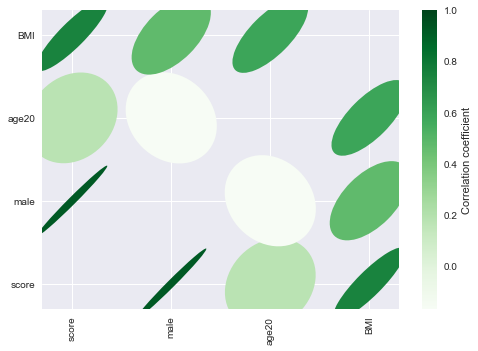

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [116]:
from matplotlib.collections import EllipseCollection
'''
arr = [[4, 0, 1, 27], 
       [7, 1, 1, 29], 
       [6, 1, 0, 23], 
       [2, 0, 0, 20], 
       [3, 0, 1, 21]]
print(np.corrcoef(arr)) #USELESS???
'''
data = pd.DataFrame([["A", 4, 0, 1, 27], 
                     ["B", 7, 1, 1, 29], 
                     ["C", 6, 1, 0, 23], 
                     ["D", 2, 0, 0, 20], 
                     ["etc.", 3, 0, 1, 21]], 
                         columns=["ID", "score", "male", "age20", "BMI"])
print (data.corr())

def plot_corr_ellipses(data, ax=None, **kwargs):
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data.corr(), ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)
current_fig = plt.gcf()  
#current_fig.savefig('my_0.pdf', bbox_inches='tight')  
plt.show()

# install seaborn by running conda install -c anaconda seaborn=0.7.1
import seaborn as sns
sns.clustermap(data=data.corr(), annot=True, cmap='Greens').savefig('my_1.pdf', bbox_inches='tight')


#### 1.4.2.3 Two-way Table (用于非连续变量和非连续型变量)

#### 1.4.2.4 Stacked Column Chart 堆积柱图 (用于非连续变量和非连续型变量)

In [117]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

TESTDATA = StringIO("""EMPID;Gender;Age;Sales;BMI;Income
                       E001;M;34;123;Normal;350
                       E002;F;40;114;Overweight;450
                       E003;F;37;135;Obesity;169
                       E004;M;30;139;Underweight;189
                       E005;F;44;117;Underweight;183
                       E006;M;36;121;Normal;80
                       E007;M;32;133;Obesity;166
                       E008;F;26;140;Normal;120
                       E009;M;32;133;Normal;75
                       E010;M;36;133;Underweight;40""")

df = pd.read_csv(TESTDATA, sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
EMPID     10 non-null object
Gender    10 non-null object
Age       10 non-null int64
Sales     10 non-null int64
BMI       10 non-null object
Income    10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


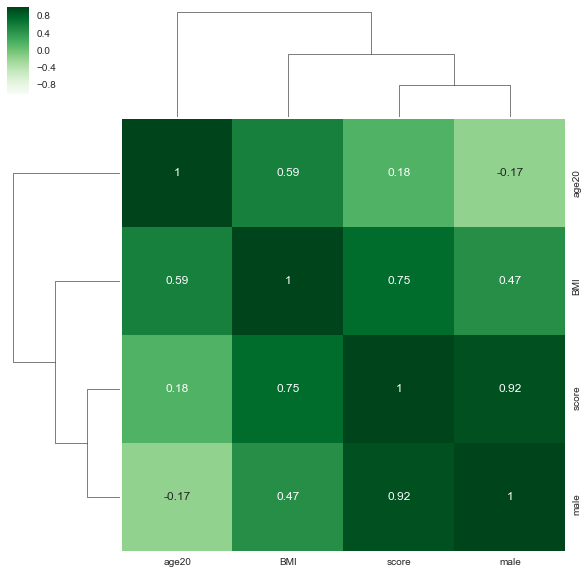

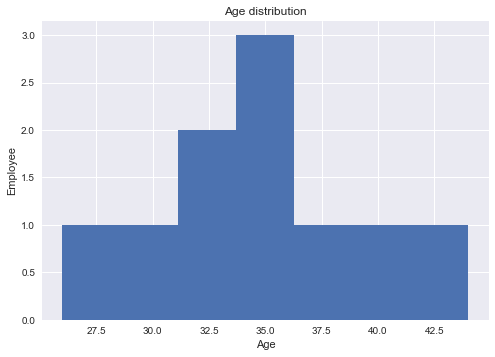

In [118]:
# 1、直方图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins=7)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Employee')
plt.show()

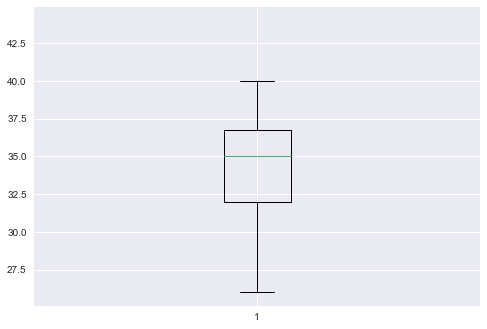

In [119]:
# 2、箱线图  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df['Age'])
plt.show()

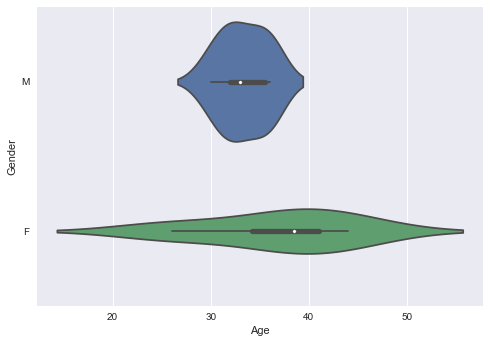

In [120]:
# 3、小提琴图
import seaborn as sns
sns.violinplot(df['Age'], df['Gender'])
sns.despine()
plt.show()

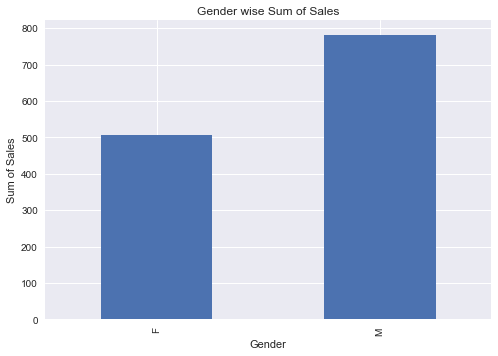

In [121]:
# 4、条形图
var = df.groupby('Gender').Sales.sum()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Sum of Sales')
ax1.set_title('Gender wise Sum of Sales')
var.plot(kind='bar')
plt.show()

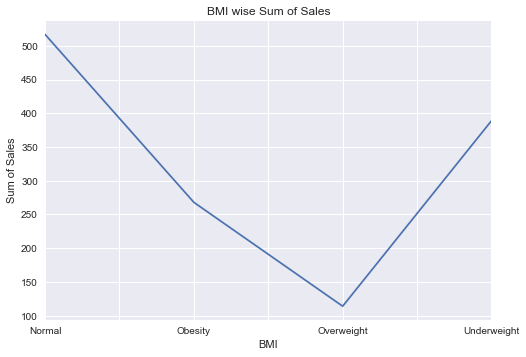

In [122]:
# 5、折线图
var = df.groupby('BMI').Sales.sum()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('BMI')
ax.set_ylabel('Sum of Sales')
ax.set_title('BMI wise Sum of Sales')
var.plot(kind='line')
plt.show()

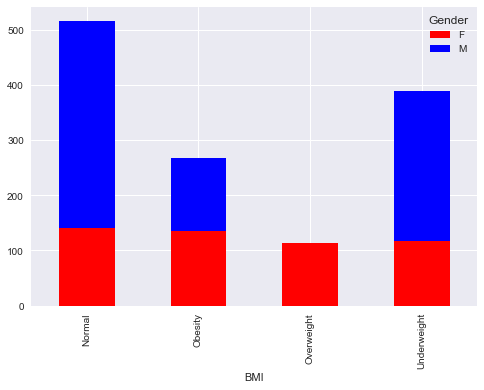

In [123]:
# 6、堆积柱形图
var = df.groupby(['BMI', 'Gender']).Sales.sum()
var.unstack().plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.show()

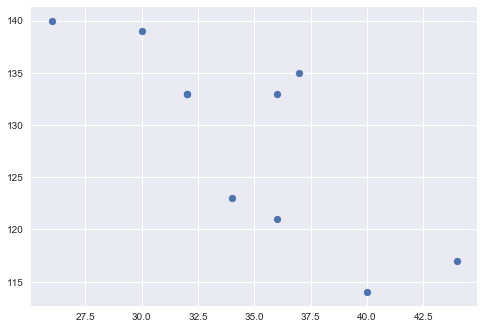

In [124]:
# 7、散点图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Age'], df['Sales'])
plt.show()

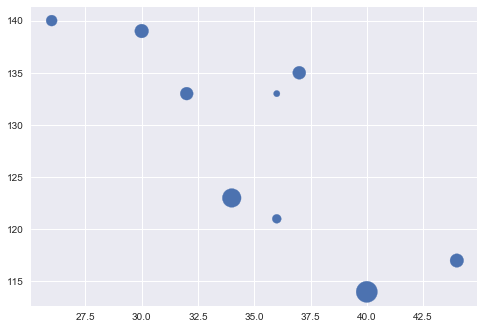

In [125]:
# 8、气泡图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Age'], df['Sales'], s=df['Income'])  # 第三个变量表明根据收入气泡的大小
plt.show()

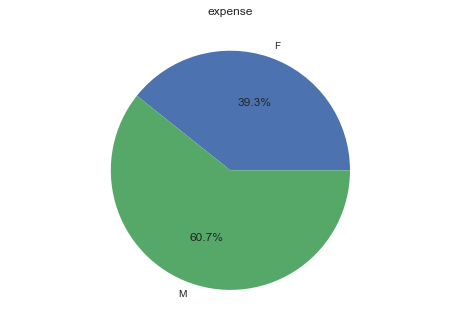

In [126]:
# 9、饼图
var = df.groupby(['Gender']).sum().stack()
temp = var.unstack()
type(temp)
x_list = temp['Sales']
label_list = temp.index
plt.axis('equal')
plt.pie(x_list, labels=label_list, autopct='%1.1f%%')
plt.title('expense')
plt.show()

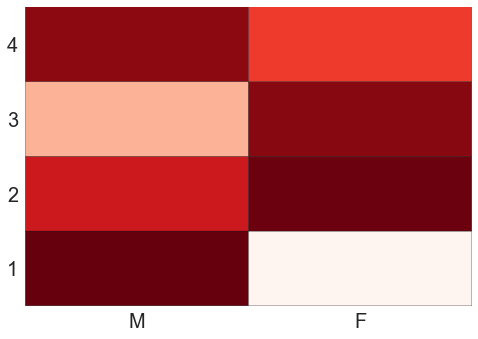

In [127]:
# 10、热图
data = np.random.rand(4, 2)
rows = list('1234')
columns = list('MF')
fig, ax = plt.subplots()
ax.pcolor(data, cmap=plt.cm.Reds, edgecolor='k')
ax.set_xticks(np.arange(0, 2)+0.5)
ax.set_yticks(np.arange(0, 4)+0.5)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xticklabels(columns, minor=False, fontsize=20)
ax.set_yticklabels(rows, minor=False, fontsize=20)
plt.show()

#### 1.4.2.5 Chi-square Test (用于非连续变量和非连续型变量)
卡方分布（Chi-square Distribution, $\mathbf{χ^2}$-Distribution）率统计里常用的一种概率分布, 也是统计推断里应用最广泛的概率分布之一, 在假设检验与置信区间的计算中经常能见到卡方分布的身影。

我们先来看看卡方分布的定义:  
若k个独立的随机变量 ${Z_1,Z_2,⋯,Z_k}$, 且符合标准正态分布 ${N(0, 1)}$, 则这k个随机变量的平方和 
${X=\sum\limits_{i=1}^{k}{Z_i^2}}$ 为服从自由度为k的卡方分布, 记为: $X∼χ^2(k)$ , 也可以记为: $X∼χ^2k$ 。卡方分布的期望与方差分为为: $E(χ^2)=n, D(χ^2)=2n$, 其中n为卡方分布的自由度。

$χ^2$ 检验是以 $χ^2$ 分布为基础的一种假设检验方法, 主要用于分类变量。其基本思想是根据样本数据推断总体的分布与期望分布是否有显著性差异, 或者推断两个分类变量是否相关或者独立。

一般可以设原假设为 $H_0$: 观察频数与期望频数没有差异, 或者两个变量相互独立不相关。

实际应用中, 我们先假设 $H_0$ 成立, 计算出 $χ^2$ 的值, $χ^2$ 表示观察值与理论值之间的偏离程度。根据 $χ^2$ 分布, $χ^2$ 统计量以及自由度, 可以确定在 $H_0$ 成立的情况下获得当前统计量以及更极端情况的概率p。如果p很小, 说明观察值与理论值的偏离程度大, 应该拒绝原假设。否则不能拒绝原假设。

$χ^2$ 的计算公式为: $\large{{χ^2}=\sum{\frac{{(A−T)}^2}{T}}=\sum{\frac{(observed-expected)^2}{expected}}=\sum{\frac{(f_o-f_e)^2}{f_e}}}$

当某一期望次数小于5时, 应该利用校正公式计算卡方值。校正公式为: $\large{{χ^2}=\sum{\frac{(|\ f_o-f_e | -0.5)^2}{f_e}}}$

其中, A为实际值, T为理论值。
$χ^2$ 用于衡量实际值与理论值的差异程度, 这也是卡方检验的核心思想。$χ^2$ 包含了以下两个信息:  
1.实际值与理论值偏差的绝对大小。 
2.差异程度与理论值的相对大小。

Pearson $\mathbf{χ^2}$, 其计算公式为: $\large{{χ^2}=\sum{\frac{(A-E)^2}{E}}=\sum\limits_{i=1}^{k}{\frac{(A_i-E_i)^2}{E_i}}=\sum\limits_{i=1}^{k}{\frac{(A_i-np_i)^2}{np_i}}}$

p小于0.05就拒绝原假设

In [128]:
from scipy.stats import chisquare 

observ0 = np.array([[0.1, 1.1], [6.8, 7.1], [-3.5, -4.1], [2.0, 2.7], [4.1, 2.8], 
                    [3.1, 5.0], [-0.8, -1.3], [0.9, 1.2], [5.0, 6.4], [3.9, 4.0]]) #拒绝
observ1 = np.array([[0.1, -4.1], [0.1, 6.8], [0.1, -3.5], [0.1, -4.1], [0.1, -4.1], 
                    [0.1, 10.1], [0.1, 0.8], [0.1, 3.5], [0.1, -4.1], [0.1, -4.1]]) #接受/拒绝
test0 = stats.chisquare(observ0)
print(test0)
test1 = stats.chisquare(observ1)
print(test1)

Power_divergenceResult(statistic=array([38.8537037 , 42.83092369]), pvalue=array([1.22417261e-05, 2.31521986e-06]))
Power_divergenceResult(statistic=array([ 1.92592994e-32, -9.16628571e+02]), pvalue=array([1., 1.]))


#### 1.4.2.6 Box-Plot 箱线图 (用于非连续变量和连续型变量)

#### 1.4.2.7 ANOVA (用于非连续变量和连续型变量)
方差分析（ANOVA）又称“变异数分析”或“F检验”, 是由R.A.Fister发明的, 用于两个及两个以上样本均数差别的显著性检验。

In [129]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

dat = StringIO("""Variety;rep;y
                  A;b1;15.3
                  B;b1;18
                  C;b1;16.6
                  D;b1;16.4
                  E;b1;13.7""")
df = pd.read_csv(dat, sep=";")
df.head()

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#One-way ANOVA 单因素方差分析
model = ols('y ~ Variety', df).fit()
anovat = anova_lm(model)
print(anovat)

           df        sum_sq   mean_sq    F  PR(>F)
Variety   4.0  1.030000e+01  2.575000  0.0     NaN
Residual  0.0  3.060780e-28       inf  NaN     NaN


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr/model.df_resid))
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [130]:
#二因素方差分析
dat = StringIO("""loc;cul;y
                  Ann;BH93;4.46
                  Ari;BH93;4.417
                  Aug;BH93;4.669
                  Cas;BH93;4.732
                  Del;BH93;4.39""")
df = pd.read_csv(dat, sep=";")
#df.head()
formula = 'y ~ loc + cul'
anova_results = anova_lm(ols(formula, df).fit())
print(anova_results)

           df        sum_sq   mean_sq    F  PR(>F)
loc       4.0  9.732920e-02  0.024332  0.0     NaN
cul       0.0  0.000000e+00       NaN  NaN     NaN
Residual  0.0  2.129924e-29       inf  NaN     NaN


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr/model.df_resid))
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [131]:
#单因素方差分析样例和代码 (One-Way ANOVA)
#import re
#import sys
from scipy.stats import f
 
def main(instance):
    alpha = 0.05
    group_num = len(instance)
    ingroup_num = len(instance[0])
    group_mean = [np.mean(ele) for ele in instance]
    grand_mean = np.mean(group_mean)
    bg_squared_difference = sum([ingroup_num * ((ele - grand_mean) ** 2) for ele in group_mean])
    bg_degree = group_num - 1
    bg_mean_square = bg_squared_difference / bg_degree
 
    within_group_square = 0
    for i in range(group_num):
        for j in range(ingroup_num):
            within_group_square += (instance[i][j] - group_mean[i]) ** 2
 
    within_group_degree = group_num * (ingroup_num - 1)
 
    within_group_difference = within_group_square / within_group_degree
 
    F_practical = bg_mean_square / within_group_difference
    F_expected = f.ppf(alpha, bg_degree, within_group_degree)
 
    if F_practical > F_expected: return False 
    return True
 
if __name__ == "__main__":
    #reload(sys)
    #sys.setdefaultencoding("utf-8")
 
    instance1 = [[6, 8, 4, 5, 3, 4],
                [8, 12, 9, 11, 6, 8],
                [13, 9, 11, 8, 7, 12]]
    instance2 = [[13, 9, 11, 8, 7, 12],
                [13, 9, 11, 8, 7, 12]]
    print(main(instance1))

False


#### 1.4.2.8 t-test (用于非连续变量和连续型变量)
T检验是假设检验的一种, 又叫student t检验（Student’s t test）, 主要用于样本含量较小（例如n<30）, 总体标准差σ未知的正态分布资料。 
T检验用于检验两个总体的均值差异是否显著。
由于样本服从正态分布, 且样本数量较小（10）, 所以这里要用到的统计量为t统计量, 公式如下: $\large{t=\frac{\bar{x}-\mu}{S/\sqrt{n}}}\sim t(n-1)$ （单总体t检验）。其中$\mathbf{\bar{x}}$:样本均值; μ:总体均值; S:样本标准差; n:样本容量; 该t统计量服从自由度为n−1的t分布。

现在, 让我们尝试引入α, 用另一种流程解决例1: 
1. 建立原假设和备择假设: $H_0$: $\mu⩾20$; $H_1$: $\mu<20$

2. 确定α: 令 α=0.05 （α的值通常为0.01,0.05,0.1, 视具体问题而定）

3. 确定用于决策的拒绝域: 
在确定了α和t统计量自由度（根据样本容量可以求出, 在这个例子中, 自由度为[样本容量-1]）的前提下, 我们可以通过查询t分位数表, 找出“拒绝域”, 如果t统计量落入拒绝域内, 就拒绝原假设, 否则接收原假设。 
根据t分位数表, 我们查出当自由度为9时, t⩽−1.833的概率为0.05, 因此, 拒绝域为{t|t⩽−1.833}

4. 查看样本结果是否位于拒绝域内: 
将样本均值和样本标准差带入t统计量计算公式, 得出t=-3.00, 落入拒绝域内

5. 做出决策: 
拒绝原假设 $H_0$ , 接受备择假设 $H_1$ , 认为样本均值与总体均值差异显著, 认为所有的引擎排放量平均值小于20ppm

以上就是t检验的标准化流程。

单总体t检验: $\large{t=\frac{\bar{x}-\mu}{S/\sqrt{n}}}\sim t(n-1)$ 其中$\mathbf{\bar{x}}$: 样本均值; μ: 总体均值; S: 样本标准差; n: 样本容量;

独立样本t检验: $\large{t=\frac{\bar{x}-\bar{y}}{S_w\sqrt{\frac{1}{m}+\frac{1}{n}}}\sim t(m+n-2)}$ 
其中 $\large{S_w=\frac{1}{m+n+1}[(m-1)S_1^2+(n-1)S_2^2]}$ 
其中 $\mathbf{\bar{x}}$: 第一个样本均值; $\mathbf{\bar{y}}$: 第二个样本均值; m: 第一个样本容量; n: 第二个样本容量; $\mathbf{S_1^1}$: 第一个样本方差; $\mathbf{S_2^2}$: 第二个样本方差

配对样本t检验: $\large{t=\frac{\bar{x_d}}{S_d/\sqrt{n}}}$ 其中$\mathbf{x_d}$: 新样本均值; 
$\mathbf{S_d}$: 新样本标准差; n: 新样本容量

In [132]:
##单样本T检验-ttest_1samp

#生成50行x2列的数据
np.random.seed(7654567)  # 保证每次运行都会得到相同结果
# 均值为5，方差为10
rvs = stats.norm.rvs(loc=5, scale=10, size=(50, 2))
#print(rvs)

In [133]:
#1. 检验两列数的均值与1和2的差异是否显著
stats.ttest_1samp(rvs, [1, 2])

#返回结果：
#Ttest_1sampResult(statistic=array([ 2.0801775 , 2.44893711]), 
#   pvalue=array([ 0.04276084, 0.01795186]))
#分别显示两列数的t统计量和p值。由p值分别为0.042和0.018，
#当p值小于0.05时，认为差异显著，即第一列数的均值不等于1，第二列数的均值不等于2。

Ttest_1sampResult(statistic=array([2.0801775 , 2.44893711]), pvalue=array([0.04276084, 0.01795186]))

In [134]:
#2. 不拒绝原假设——均值等于5
stats.ttest_1samp(rvs, 5.0)
#Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), 
#   pvalue=array([ 0.49961383, 0.96568674]))

Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))

In [135]:
#3. 拒绝原假设——均值不等于5
stats.ttest_1samp(rvs, 0.0)
#Ttest_1sampResult(statistic=array([ 2.77025808, 4.11038784]), 
#   pvalue=array([ 0.00789095, 0.00014999]))

Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))

In [136]:
#第一列数均值等于5，第二列数均值不等于0
stats.ttest_1samp(rvs, [5.0, 0.0])
#Ttest_1sampResult(statistic=array([-0.68014479, 4.11038784]), 
#   pvalue=array([ 4.99613833e-01, 1.49986458e-04]))

Ttest_1sampResult(statistic=array([-0.68014479,  4.11038784]), pvalue=array([4.99613833e-01, 1.49986458e-04]))

In [137]:
#第一行数均值等于5，第二行数均值不等于0

#axis=0按列运算，axis=1按行运算
stats.ttest_1samp(rvs.T, [5.0, 0.0], axis=1) 
#Ttest_1sampResult(statistic=array([-0.68014479, 4.11038784]), 
#   pvalue=array([ 4.99613833e-01, 1.49986458e-04]))

Ttest_1sampResult(statistic=array([-0.68014479,  4.11038784]), pvalue=array([4.99613833e-01, 1.49986458e-04]))

In [138]:
#将两列数据均值分别与5.0和0.0比较，得到4个t统计量和p值
stats.ttest_1samp(rvs, [[5.0], [0.0]])
#Ttest_1sampResult(statistic=array([[-0.68014479, -0.04323899], 
#   [ 2.77025808, 4.11038784]]), pvalue=array([[ 4.99613833e-01, 9.65686743e-01], 
#   [ 7.89094663e-03, 1.49986458e-04]]))

Ttest_1sampResult(statistic=array([[-0.68014479, -0.04323899],
       [ 2.77025808,  4.11038784]]), pvalue=array([[4.99613833e-01, 9.65686743e-01],
       [7.89094663e-03, 1.49986458e-04]]))

#### 1.4.2.9 z-test (用于非连续变量和连续型变量)
Z检验（Z Test）是一般用于大样本（即样本容量大于30）平均值差异性检验的方法。它是用标准正态分布的理论来推断差异发生的概率, 从而比较两个平均数的差异是否显著。在国内也被称作u检验。
当已知标准差时, 验证一组数的均值是否与某一期望值相等时, 用Z检验。

第一步: 建立虚无假设, 即先假定两个平均数之间没有显著差异。

第二步: 计算统计量Z值, 对于不同类型的问题选用不同的统计量计算方法。

1、如果检验一个样本平均数x与一个已知的总体平均数μ的差异是否显著。其Z值计算公式为: $\large{Z=\frac{x-\mu}{{s}/{\sqrt{n}}}}$ 其中: x是检验样本的平均数；μ是已知总体的平均数；s是总体的标准差；n是样本容量。

2、如果检验来自两个的两组样本平均数的差异性, 从而判断它们各自代表的总体的差异是否显著。其Z值计算公式为: $\large{Z=\frac{x_1-x_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}}$ 或 $\large{Z=\frac{(\overline{x}_1-\overline{x}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}}$其中: $x_1, x_2$ 是样本1, 样本2的平均数；$s_1,s_2$ 是样本1, 样本2的标准差；$n_1,n_2$ 是样本1, 样本2的容量。

第三步: 比较计算所得Z值与理论Z值, 推断发生的概率, 依据Z值与差异显著性关系表作出判断。如下表所示: 
$$\begin{array}{cols}
\ \ Z\ \ \ \ \ \ \ P值\ \ \ \ \ \ 差异程度
\\>2.58\ \ <0.01\ \ 非常显著
\\>1.96\ \ <0.05\ \ 显著\ \ \ \ 
\\<1.96\ \ >0.05\ \ 不显著\ \ \ \end{array}$$

第四步: 根据是以上分析, 结合具体情况, 作出结论。

### 1.4.3 缺失值处理
#### 1.4.3.1 List-wise Deletion
#### 1.4.3.2 Pair-wise Deletion
#### 1.4.3.3 均值-众数-中位数替换法
一般替换

相似替换
#### 1.4.3.4 预测模型: 回归, 方差分析, 逻辑回归, ...
#### 1.4.3.5 最近邻
#### 1.4.3.6 固定值
#### 1.4.3.7 拉格朗日插值
#### 1.4.3.8 牛顿插值
#### 1.4.3.9 Hermite插值
#### 1.4.3.10 分段插值
#### 1.4.3.11 样条插值

### 1.4.4 离群值处理 Outlier
#### 1.4.4.1 简单统计量分析
#### 1.4.4.2 3σ原则
#### 1.4.4.5 箱型图分析

### 1.4.5 变量变换

#### 1.4.5.1 取对数

#### 1.4.5.2 平方根/立方根

#### 1.4.5.3 分组: binning

### 1.4.5 变量创建

#### 1.4.5.1 创建派生变量
#### 1.4.5.2 创建虚拟变量

## 1.5 质量把控

### 1.5.1 分布分析

#### 1.5.1.1 定量数据分布分析
1）求极差。极差=最大值一最小值

2）决定组距与组数。组数=极差/组距

3）决定分点。

4）列出频率分布表。

5）绘制频率分布直方图。
#### 1.5.1.2 定性数据分布分析
对于定性变量, 常常根据变量的分类类型来分组, 可以采用饼图和条形图来描述定性变量的分布。
#### 1.5.1.3 分布函数
Gamma 函数的数学表达式如下: $\Gamma(\alpha)=\int_0^{+\infty}t^{\alpha-1} e^{-\alpha} \,dt$

Gamma 分布的数学表达式如下: $X\sim\Gamma(\alpha,\beta)$

$$f_X(x| \alpha,\beta)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}, \qquad x>0 \quad \alpha,\beta>0$$

$$E(X)=\frac{\alpha}{\beta}$$

$$D(x)=\frac{\alpha}{\beta^2}$$

Gamma分布和很多著名分布存在紧密联系: 厄兰分布（Erlang distribution）、卡方分布（Chi-squared distribution）、指数分布（Exponential distribution）、贝塔分布（Beta distribution）都是 Gamma 分布的一个特例。

当 $\alpha$ 为整数的时候, Gamma 分布就变成一个厄兰分布。

当 $\alpha=n/2,\ \beta=1/2$ 时, Gamma 分布变成一个卡方分布。

当 $\alpha=1,\ \beta=\lambda$ 时, Gamma 分布变成一个参数为$\lambda$的指数分布: $f_X(x|\alpha=1,\beta=\lambda)=\lambda e^{-\lambda x}$

Gamma 分布的可加性 

假设随机变量 $X_1,X_2,\cdots,X_n$ 相互独立, 且都服从 Gamma 分布, $X_i \sim \Gamma(\alpha_i,\beta)$. 令 $Y=X_1+X_2+\cdots+X_n$, 则 $Y\sim \Gamma(\alpha_1+\alpha_2+\cdots+\alpha_n,\beta)$ Gamma 分布。
#### 1.5.1.4 直方图: Histogram
#### 1.5.1.5 核密度估计函数

#### 1.5.1.6 经验分布

#### 1.5.1.7 QQ图

### 1.5.2 对比分析
#### 1.5.2.1 绝对数比较
#### 1.5.2.2 相对数比较
1）结构相对数;
2）比例相对数;
3）比较相对数;
4）强度相对数;
5）计划完成程度相对数;
6）动态相对数。

### 1.5.3 统计量分析
#### 1.5.3.1 集中趋势度量
均值: mean; 加权均值; 中位数: median; 众数: mode
#### 1.5.3.2 分散趋势度量
极差; 方差: variance; 标准差: standard deviation; 样本标准误差: 即标准差除以样本个数的开方; 变异系数; 四分位数间距: quantile; 箱型图: 中位数、下四分位数、上四分位数、最小值、最大值。这五个数称为样本数据的五数总结。
#### 1.5.3.3 分布形状度量
峰度系数; 偏度系数

### 1.5.4 周期性分析

### 1.5.5 贡献度分析(帕累托分析, 20/80定律)

### 1.5.6 相关性分析
#### 1.5.6.1 直接绘制散点图
#### 1.5.6.2 绘制散点图矩阵
#### 1.5.6.3 相关系数
1)Pearson相关系数: 要求连续变量的取值服从正态分布

2)Spearman秩相关系数: 也称等级相关系数, 只要两个变量具有严格单调的函数关系, 那么它们就是完全Spearman相关的, 这与Pearson相关不同。Pearson相关只有在变量具有线性关系时才是完全相关的。

对于更一般的情况有其他的一些解决方案, Spearman秩相关系数就是其中一种。Spearman秩相关系数是一种无参数（与分布无关）检验方法, 用于度量变量之间联系的强弱。在没有重复数据的情况下, 如果一个变量是另外一个变量的严格单调函数, 则Spearman秩相关系数就是+1或-1, 称变量完全Spearman秩相关。注意这和Pearson完全相关的区别, 只有当两变量存在线性关系时, Pearson相关系数才为+1或-1。

对原始数据 $x_i, y_i$ 按从大到小排序, 记 $x'_i, y'_i$ 为原始 $x_i, y_i$ 在排序后列表中的位置, $x'_i, y'_i$ 称为 $x_i, y_i$ 的秩次, 秩次差 $d_i=x'_i - y'_i$。Spearman秩相关系数为: $\large{\rho_s=1-\frac{6\sum{d_i^2}}{n(n^2-1)}}$

3)判定系数(Coefficient of Determination Derivation, coefficient of determination, 记为 $R^2$ 或 $r^2$ ): 判定系数是相关系数的平方, 用 $r^2$ 表示；用来衡量回归方程对y的解释程度。
对于简单线性回归而言, 判定系数为样本相关系数的平方。当加入其他回归自变量后, 决定系数相应地变为多重相关系数的平方。

假设一数据集包括 $y_1, y_2, ..., y_n$ 共n个观察值, 相对应的模型预测值分别为 $f_1, f_2, ..., f_n$ 。定义残差 $e_i=y_i-f_i$ , 平均观察值为 
$$\overline{y}=\frac{1}{n}\sum_{i=1}^{n}{y_i}$$

于是可以得到总平方和
$$SS_{tot}=\sum_{i}^{}{(y_i-\overline{y})^2}$$

回归平方和
$$SS_{reg}=\sum_{i}^{}{(f_i-\overline{y})^2}$$

残差平方和
$$SS_{res}=\sum_{i}^{}{(y_i-f_i)^2}=\sum_{i}^{}{e_i^2}$$

由此, 判定系数可定义为 [1] 
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

判定系数越接近于1, 模型的拟合优度越高。